In [197]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [198]:
def generate_data(no_of_cluster=100, blur=1, A=[1, 1], B=[5, 1]):
    a = [
        A[0] + np.random.randn(no_of_cluster) * blur,
        A[1] + np.random.randn(no_of_cluster) * blur
    ]

    b = [
        B[0] + np.random.randn(no_of_cluster) * blur,
        B[1] + np.random.randn(no_of_cluster) * blur
    ]

    zeros = np.zeros((no_of_cluster,1))
    ones  = np.ones((no_of_cluster,1))

    labels_np = np.vstack((zeros, ones))
    data_np = np.hstack((a,b)).T

    labels = torch.tensor(labels_np).float()
    data = torch.tensor(data_np).float()

    return labels, data

In [199]:
def graph_plot(data, labels, title, xlabel, ylabel):
    fig = plt.figure(figsize=(5,5))
    plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
    plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [200]:
labels, data = generate_data()

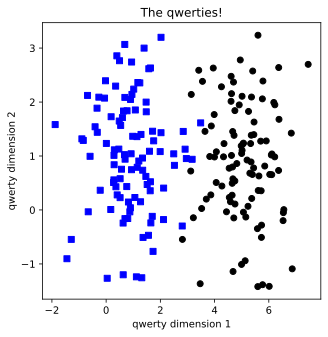

In [201]:
graph_plot(data, labels, 'The qwerties!', 'qwerty dimension 1', 'qwerty dimension 2')

In [202]:
def create_Ann_Model(learningRate):
    # model architecture
    Ann_Classify = nn.Sequential(
        nn.Linear(2,1),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(1,1),   # output unit
        #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
            )

    # loss function
    loss_function = nn.BCEWithLogitsLoss()

    # optimizer
    optimizer = torch.optim.SGD(Ann_Classify.parameters(),lr=learningRate)

    return Ann_Classify, loss_function, optimizer

In [203]:
def train_model(model, loss_function, optimizer, data, labels, num_epochs):
    losses = torch.zeros(num_epochs)

    for epoch_i in range(num_epochs):

        yHat = model(data)

        loss = loss_function(yHat,labels)
        losses[epoch_i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = model(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    total_accuracy = 100*torch.mean(((predictions>0) == labels).float())

    return losses, predictions, total_accuracy

In [204]:
def plot_losses(losses):
    plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

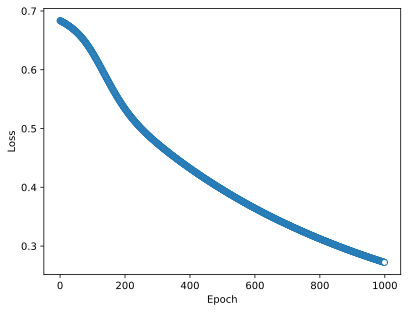

In [205]:
learningRate = 0.01
num_epochs = 1000

Ann_Classify, loss_function, optimizer = create_Ann_Model(learningRate)

losses, predictions, total_accuracy = train_model(Ann_Classify, loss_function, optimizer, data, labels, num_epochs)

plot_losses(losses)


In [206]:
learningRates = np.linspace(.001,.1,40)
num_epochs = 1000

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningRates),num_epochs))

for i,lr in enumerate(learningRates):
    Ann_Classify, loss_function, optimizer = create_Ann_Model(learningRate)

    losses, predictions, total_accuracy = train_model(Ann_Classify, loss_function, optimizer, data, labels, num_epochs)

    accByLR.append(total_accuracy)
    allLosses[i,:] = losses.detach().cpu().numpy()

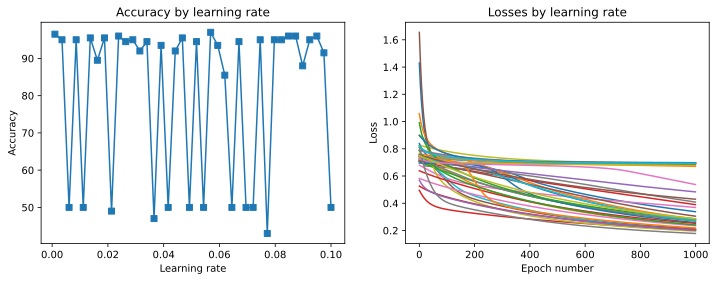

In [207]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningRates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [208]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7000)

In [209]:
def run_experiment(num_experiments, learningRates, num_epochs):
    accMeta = np.zeros((num_epochs,len(learningRates)))

    for i,lr in enumerate(learningRates):
        Ann_Classify, loss_function, optimizer = create_Ann_Model(lr)

        losses, predictions, total_accuracy = train_model(Ann_Classify, loss_function, optimizer, data, labels, num_epochs)

        accMeta[:,i] = losses.detach().cpu().numpy()

    return accMeta

In [210]:
num_experiments = 1000
no_of_epochs = 1000

accMeta = np.zeros((num_epochs,len(learningRates)))

for expi in range(num_experiments):
  for i,lr in enumerate(learningRates):
    Ann_Classify, loss_function, optimizer = create_Ann_Model(lr)

    losses, predictions, total_accuracy = train_model(Ann_Classify, loss_function, optimizer, data, labels, num_epochs)

    accMeta[expi,i] = total_accuracy


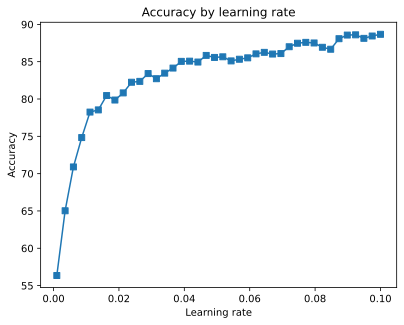

In [211]:
# now plot the results, averaged over experiments
plt.plot(learningRates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()